In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('baseball.csv')
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
data=pd.DataFrame(data)
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


Exploratory Data Analysis

In [5]:
data.shape

(30, 17)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
W      30 non-null int64
R      30 non-null int64
AB     30 non-null int64
H      30 non-null int64
2B     30 non-null int64
3B     30 non-null int64
HR     30 non-null int64
BB     30 non-null int64
SO     30 non-null int64
SB     30 non-null int64
RA     30 non-null int64
ER     30 non-null int64
ERA    30 non-null float64
CG     30 non-null int64
SHO    30 non-null int64
SV     30 non-null int64
E      30 non-null int64
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


Statistical Summary

In [7]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [8]:
nul=data.isnull().sum()
nul

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [9]:
#There is no null Value in the dataset

Checking for Correlations

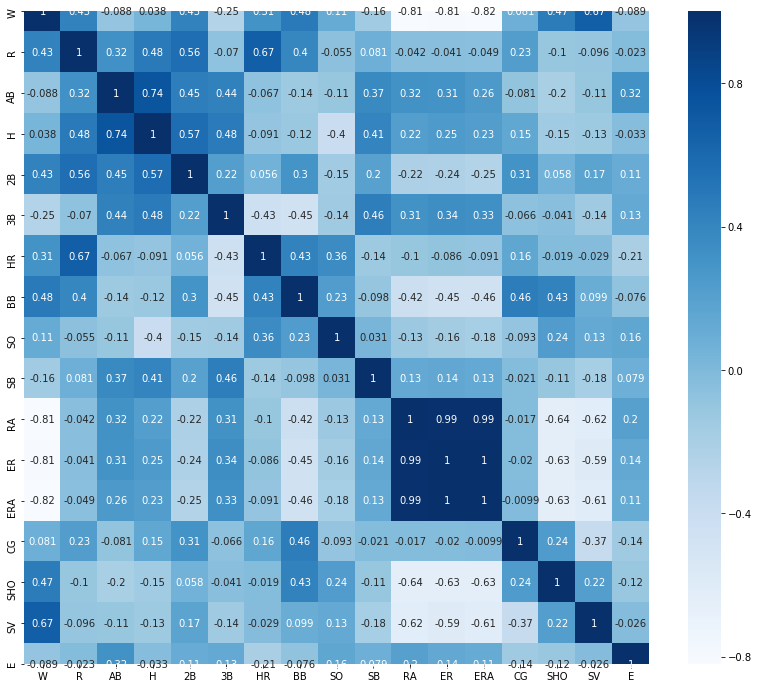

In [11]:
cor=data.corr()
plt.figure(figsize=(14,12))
sns.heatmap(cor,annot=True,cmap='Blues')

Checking for outliers

In [12]:
collist=data.columns.values
collist

array(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA',
       'ER', 'ERA', 'CG', 'SHO', 'SV', 'E'], dtype=object)

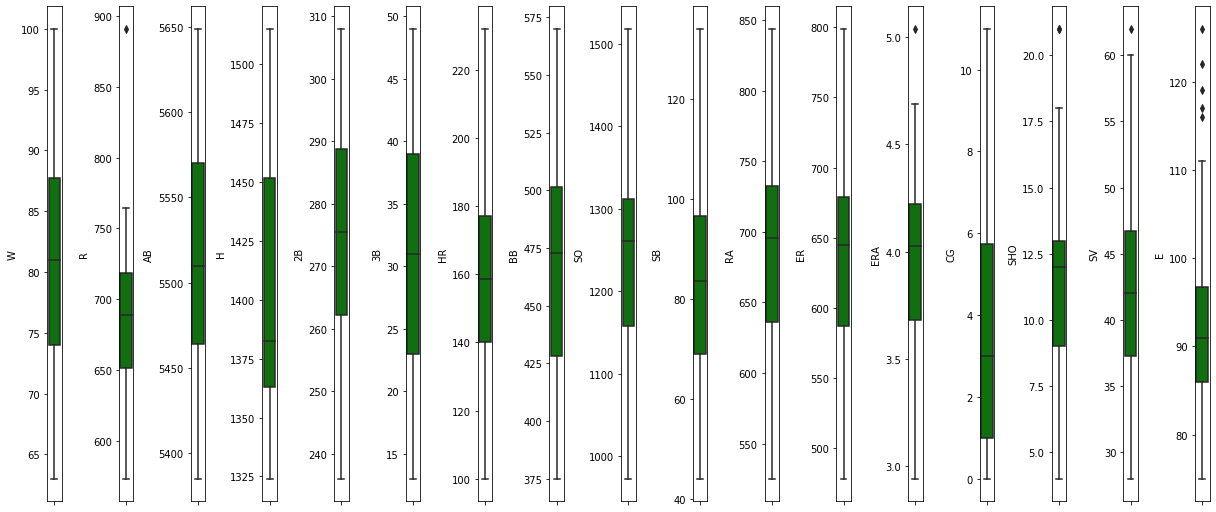

In [15]:
ncols=17
nrows=12
plt.figure(figsize=(ncols,5*ncols))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data[collist[i]],orient='v',color='green')
    plt.tight_layout()

Checking the Distribution of Skewness

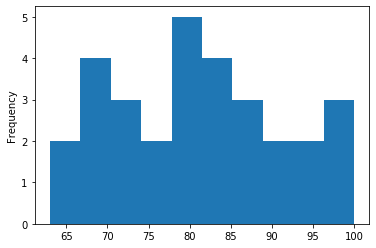

In [17]:
data.W.plot.hist()

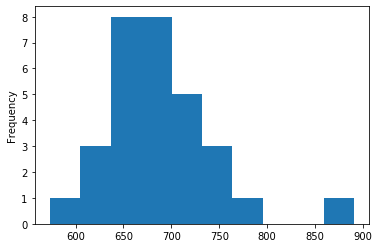

In [18]:
data.R.plot.hist()

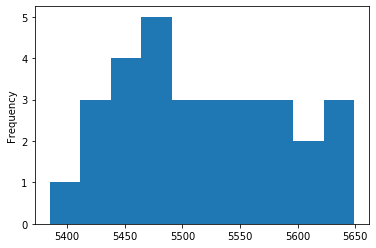

In [19]:
data.AB.plot.hist()

In [21]:
#Checking for all
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [23]:
#Removing the Outliers
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [27]:
data_new=data[(z<3).all(axis=1)]
data_new#test2=np.array([123,3526,1560,297,45,156,452,856,23,55,560,2.12,1,12,26,74])

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [29]:
print(data.shape)
print(data_new.shape)

(30, 17)
(29, 17)


In [30]:
data_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [33]:
#H,CG,SV and E are not in normal Distribution
list=['H','SV','E']
from scipy.stats import boxcox
for i in list:
    data_new[i]=boxcox(data_new[i],0)
    
data_new.skew()    

W      0.119013
R     -0.215364
AB     0.169573
H      0.732058
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.096752
E      0.583308
dtype: float64

In [34]:
#CG have some values as 0 so boxcox can't be used there
data_new['CG']=np.sqrt(data_new['CG'])
data_new['H']=np.sqrt(data_new['H'])
data_new['E']=np.sqrt(data_new['E'])
data_new.skew()# Now the Distribution is Normal

W      0.119013
R     -0.215364
AB     0.169573
H      0.730447
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.260678
SHO    0.526943
SV     0.096752
E      0.553658
dtype: float64

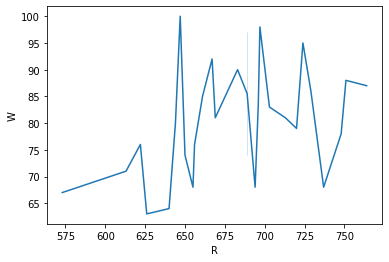

In [39]:
sns.lineplot(x='R',y='W',data=data_new)

In [ ]:
sns.lineplot(x='R',y='W',data=data_new)

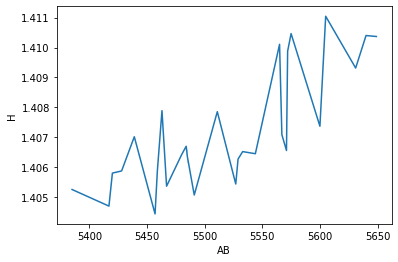

In [40]:
sns.lineplot(x='AB',y='H',data=data_new)

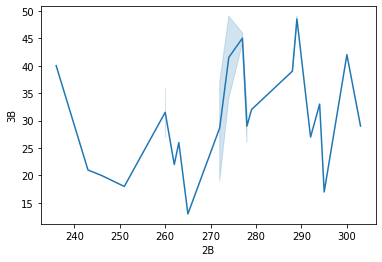

In [41]:
sns.lineplot(x='2B',y='3B',data=data_new)

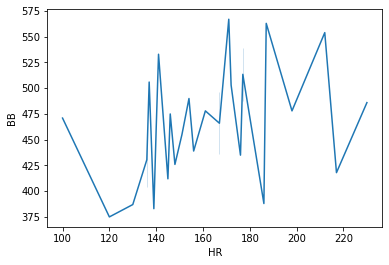

In [42]:
sns.lineplot(x='HR',y='BB',data=data_new)

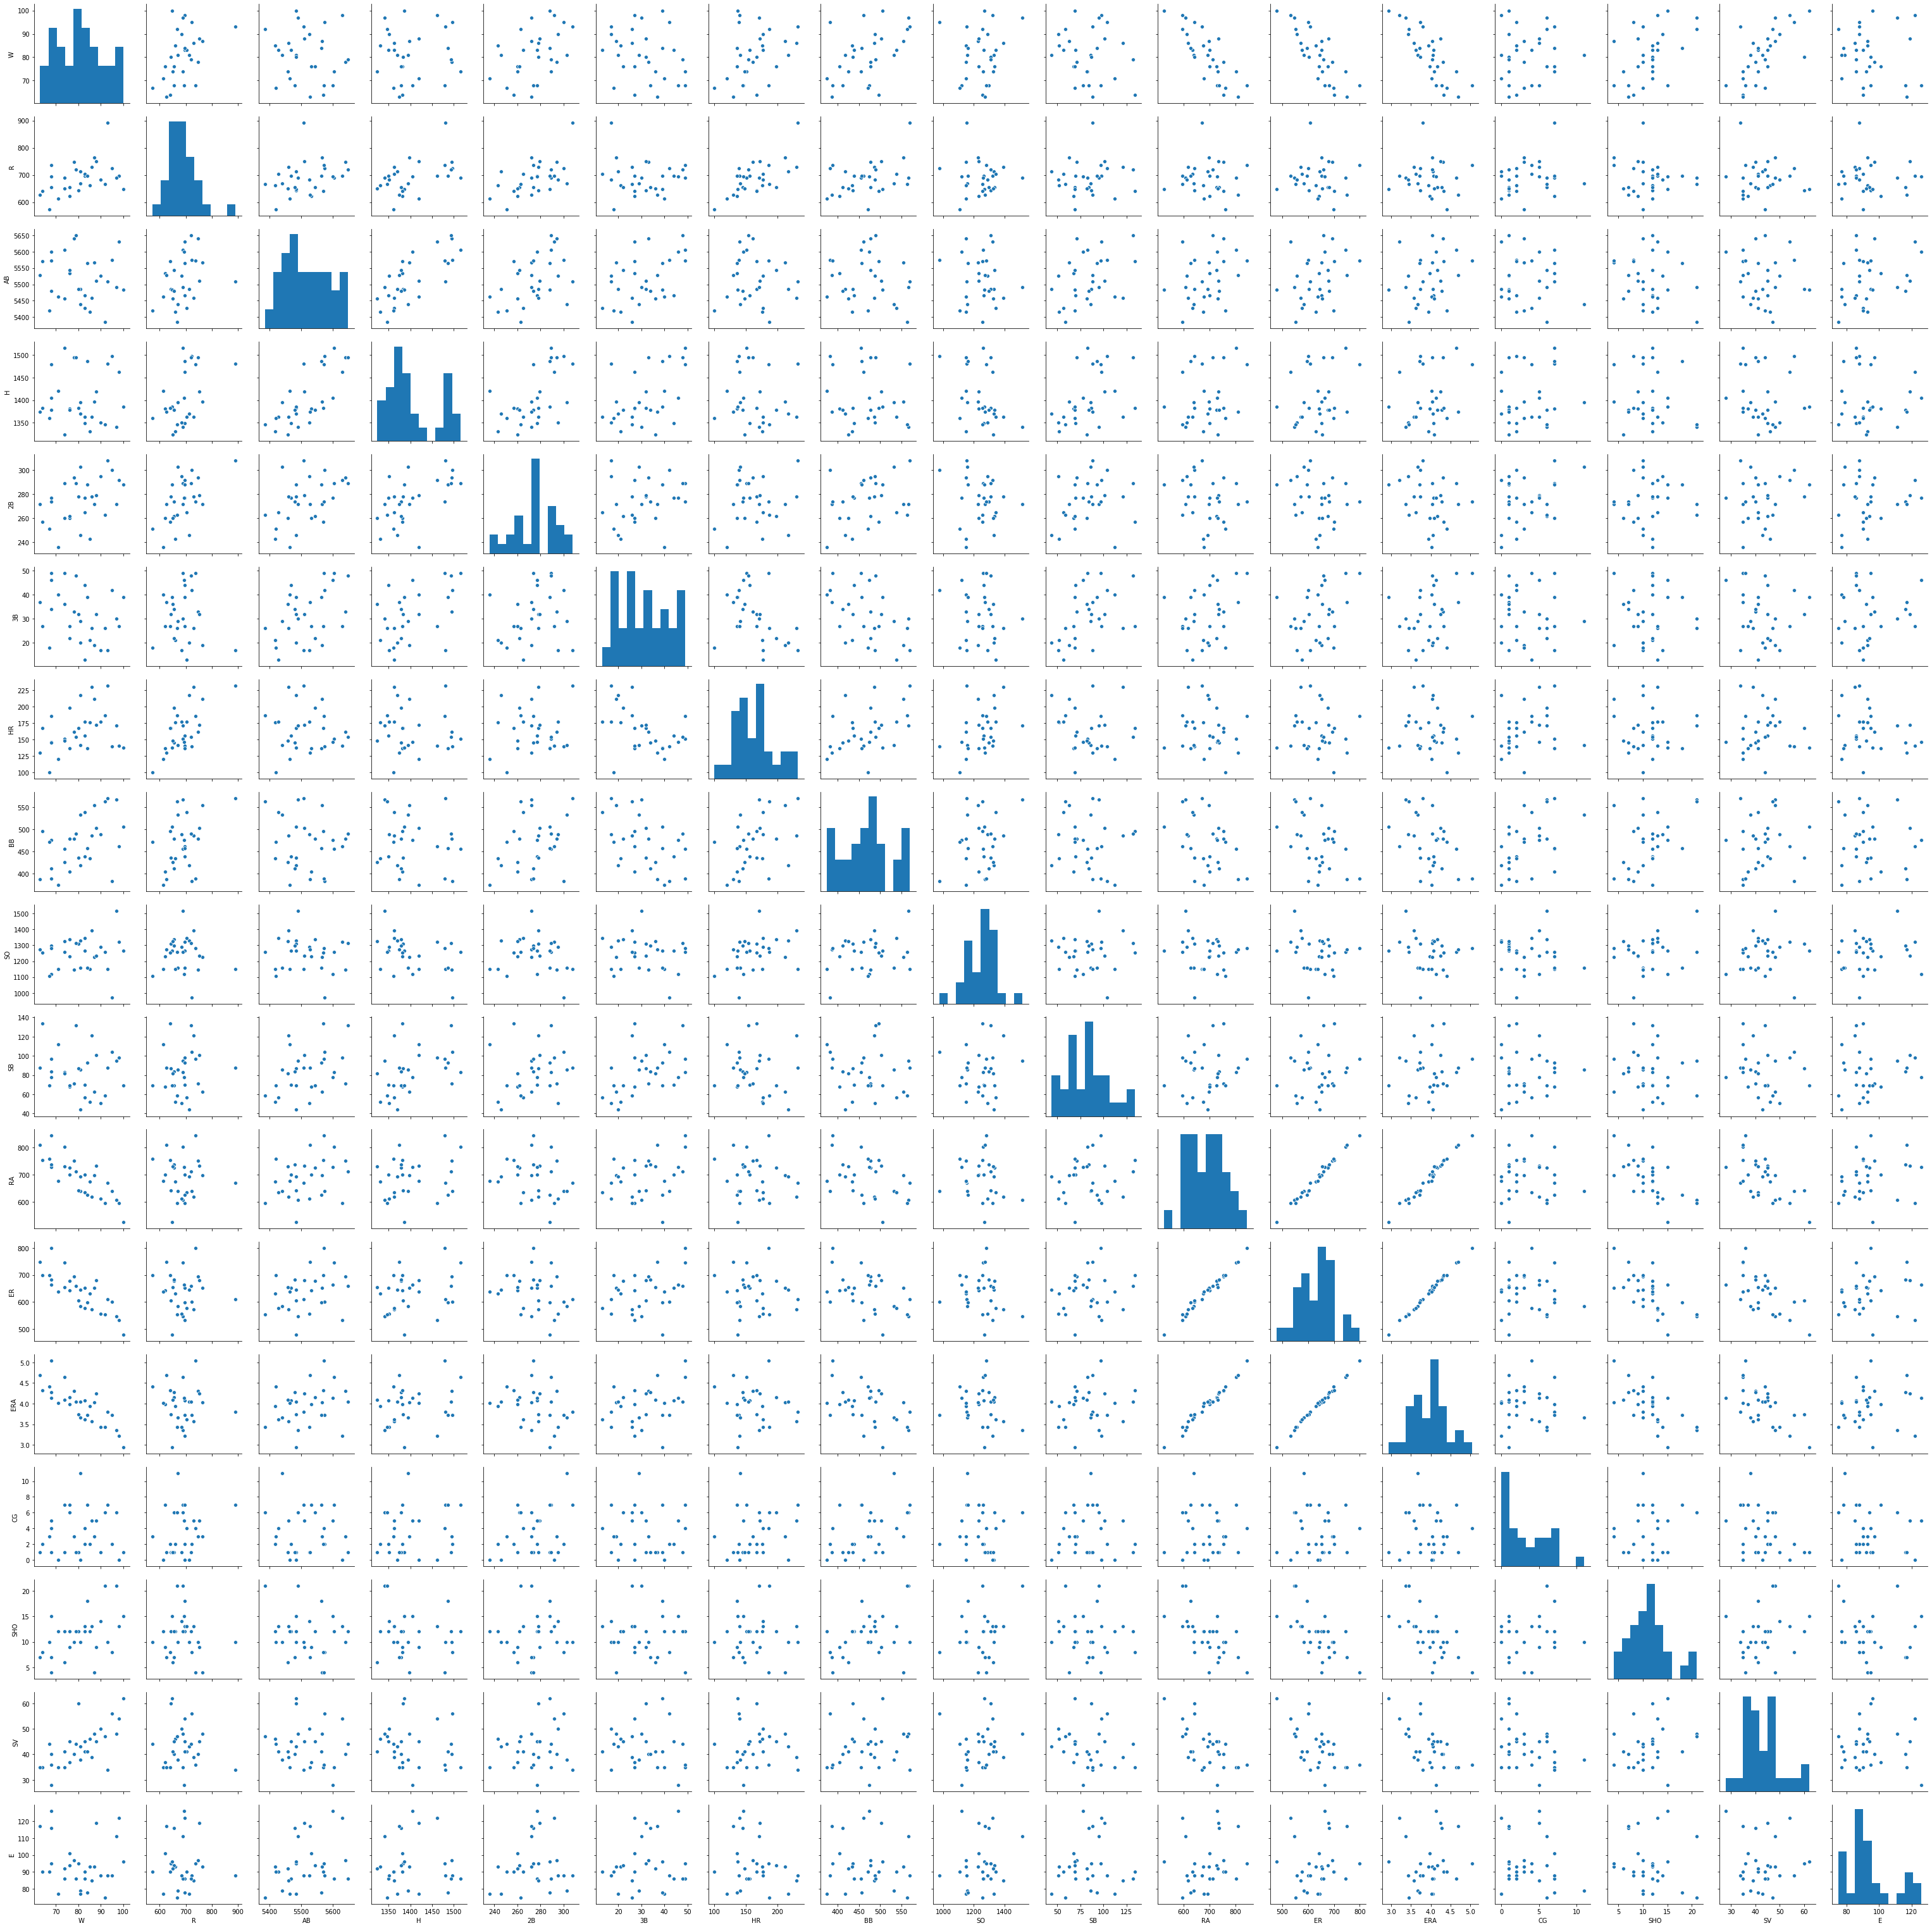

In [43]:
sns.pairplot(data)

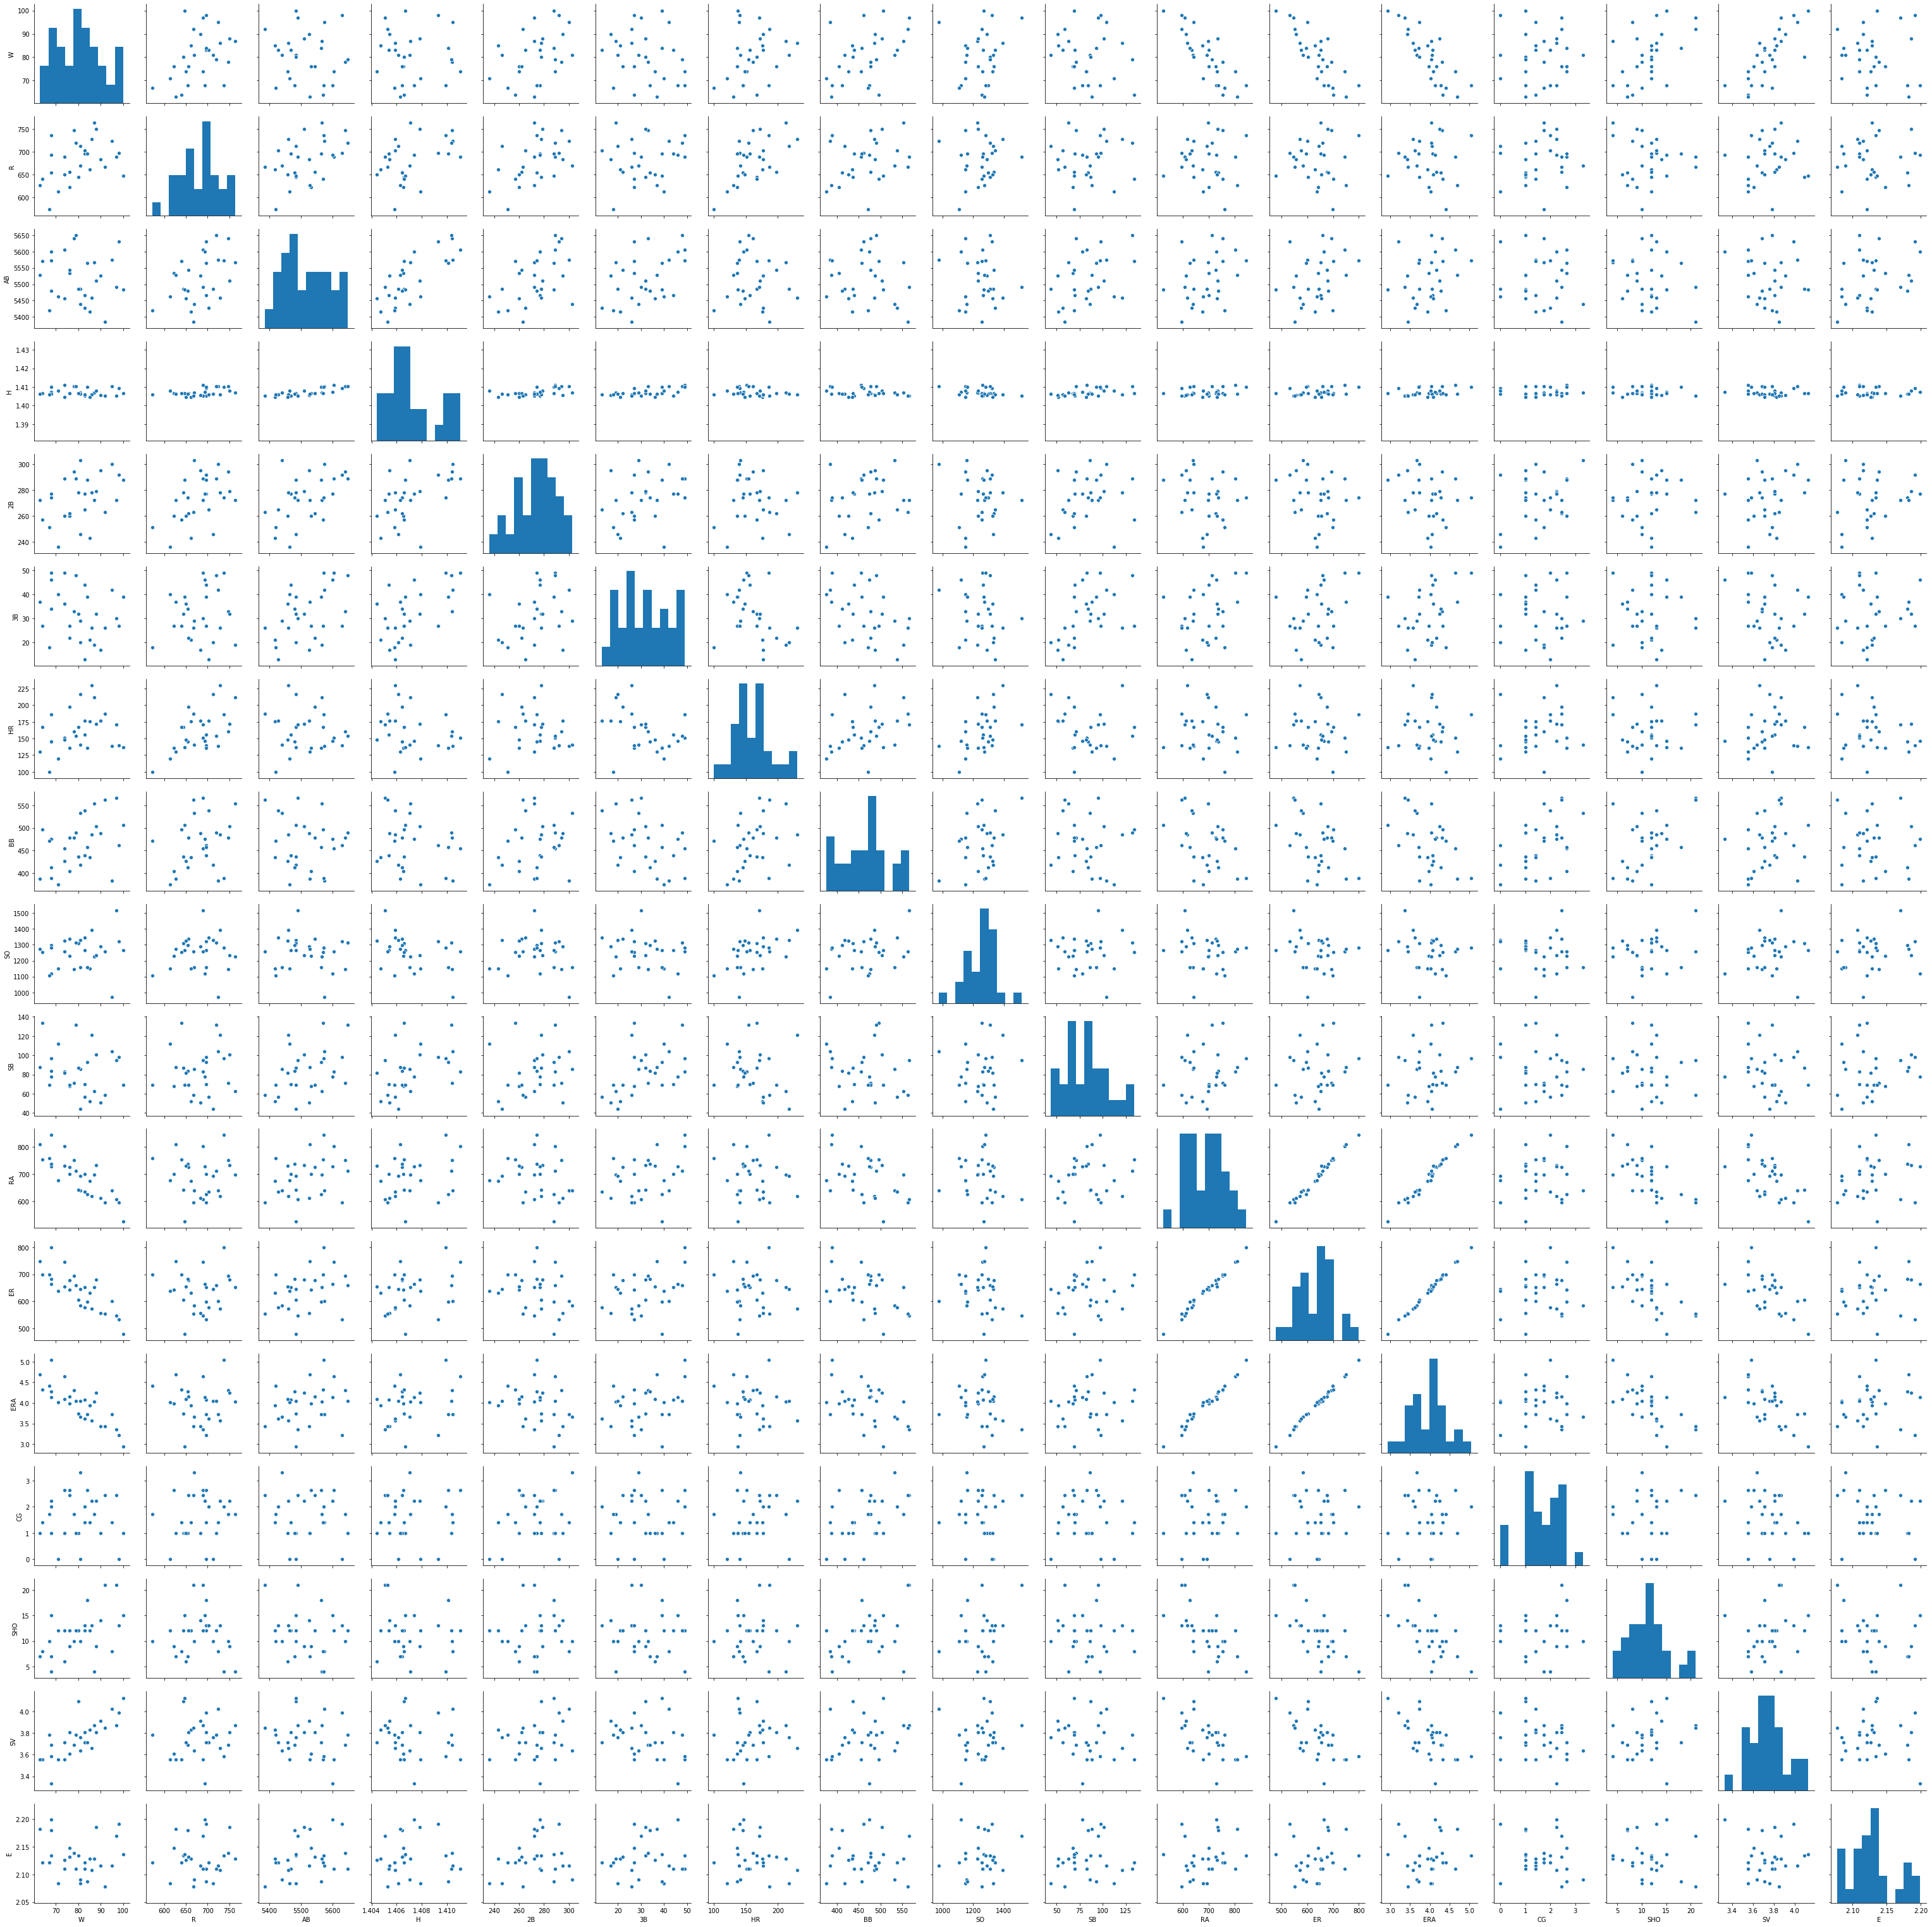

In [44]:
sns.pairplot(data_new)

In [45]:
df_x=data_new.iloc[:,1:]
df_x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1.410464,300,42,139,383,973,104,641,601,3.73,1.414214,8,4.025352,2.115972
1,696,5467,1.405372,277,44,156,439,1264,70,700,653,4.07,1.414214,12,3.806662,2.110532
2,669,5439,1.407022,303,29,141,533,1157,86,640,584,3.67,3.316625,10,3.637586,2.090322
3,622,5533,1.406527,260,27,136,404,1231,68,701,643,3.98,2.645751,9,3.610918,2.148283
4,689,5605,1.411043,289,49,151,455,1259,83,803,746,4.64,2.645751,12,3.555348,2.110532
6,764,5567,1.407092,272,19,212,554,1227,63,698,652,4.03,1.732051,4,3.871201,2.128990
7,713,5485,1.406133,246,20,217,418,1331,44,693,646,4.05,0.000000,10,3.761200,2.084180
8,644,5485,1.406598,278,32,167,436,1310,87,642,604,3.74,1.000000,12,4.094345,2.133981
9,748,5640,1.410400,294,33,161,478,1148,71,753,694,4.31,1.732051,10,3.688879,2.138857
10,751,5511,1.407858,279,32,172,503,1233,101,733,680,4.24,2.236068,9,3.806662,2.186121


In [37]:
y=data_new.loc[:,'W'].values.reshape(-1,1)
y

array([[ 95],
       [ 83],
       [ 81],
       [ 76],
       [ 74],
       [ 87],
       [ 81],
       [ 80],
       [ 78],
       [ 88],
       [ 86],
       [ 85],
       [ 76],
       [ 68],
       [100],
       [ 98],
       [ 97],
       [ 68],
       [ 64],
       [ 90],
       [ 83],
       [ 71],
       [ 67],
       [ 63],
       [ 92],
       [ 84],
       [ 79],
       [ 74],
       [ 68]], dtype=int64)

Machine Learning

In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.721135,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.253549,-0.813262,1.552157,-0.430758
1,0.331147,-0.702831,-0.951754,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.253549,0.159299,0.298007,-0.595296
2,-0.274666,-1.100253,-0.085556,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.020463,-0.326982,-0.671621,-1.206639
3,-1.329231,0.233951,-0.345591,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.218547,-0.570122,-0.824559,0.546642
4,0.174084,1.255894,2.024975,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.218547,0.159299,-1.143244,-0.595296
5,1.856900,0.716535,-0.048658,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,0.126372,-1.785822,0.668125,-0.036958
6,0.712585,-0.447345,-0.552083,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-1.944003,-0.326982,0.037287,-1.392451
7,-0.835605,-0.447345,-0.308254,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,-0.748671,0.159299,1.947821,0.114024
8,1.497899,1.752672,1.687111,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,0.126372,-0.326982,-0.377462,0.261518
9,1.565212,-0.078310,0.353175,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,0.728839,-0.570122,0.298007,1.691206


In [49]:
max_r2_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.30)
    regr=LinearRegression()
    regr.fit(train_x,train_y)
    pred=regr.predict(test_x)
    r2_scr=r2_score(test_y,pred)
    if r2_scr>max_r2_score:
        max_r2_score=r2_scr
        final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r2_score)    

max r2 score corresponding to  42  is  0.7240536054051783
max r2 score corresponding to  42  is  0.7240536054051783
max r2 score corresponding to  42  is  0.7240536054051783
max r2 score corresponding to  42  is  0.7240536054051783
max r2 score corresponding to  42  is  0.7240536054051783
max r2 score corresponding to  42  is  0.7240536054051783
max r2 score corresponding to  42  is  0.7240536054051783
max r2 score corresponding to  42  is  0.7240536054051783
max r2 score corresponding to  50  is  0.781467341412287
max r2 score corresponding to  50  is  0.781467341412287
max r2 score corresponding to  50  is  0.781467341412287
max r2 score corresponding to  50  is  0.781467341412287
max r2 score corresponding to  50  is  0.781467341412287
max r2 score corresponding to  50  is  0.781467341412287
max r2 score corresponding to  50  is  0.781467341412287
max r2 score corresponding to  50  is  0.781467341412287
max r2 score corresponding to  50  is  0.781467341412287
max r2 score correspond

In [51]:
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(regr,x,y,cv=5)
print(a_score)
print(a_score.mean())
print(np.std(a_score))

[ 0.54524829 -0.34590112  0.60115982 -0.39913701 -0.39974787]
0.000324422837037508
0.4684964457195505


In [61]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.01)
ls.fit(train_x,train_y)
ls.score(train_x,train_y)

0.9782576903291806

In [56]:
ls.coef_

array([  3.9460674 ,  -1.51995311,   1.63269247,  -2.01005334,
         0.88073374,   0.66828008,  -1.3942074 ,  -0.2672035 ,
        -0.77569875,   8.24806488,   0.        , -14.06652862,
         2.13181427,   0.71176031,   5.55438298,  -0.18359795])

In [55]:
rd=Ridge(alpha=0.01)
rd.fit(train_x,train_y)
rd.score(train_x,train_y)

0.9792763487727265

In [57]:
rd.coef_

array([[  4.05187939,  -1.91666544,   1.87816028,  -2.09053602,
          0.91824193,   0.72511687,  -1.50159758,  -0.33413357,
         -0.79523804,   9.97909857,   1.58668761, -17.47368103,
          2.13636289,   0.69027401,   5.4993897 ,  -0.23804665]])

In [64]:
from sklearn.linear_model import ElasticNet
en=ElasticNet()
en.fit(train_x,train_y)
en.score(train_x,train_y)

0.8833038395464896

In [65]:
from sklearn.linear_model import ElasticNet
en=ElasticNet(alpha=0.01)
en.fit(train_x,train_y)
en.score(train_x,train_y)

0.9729633572415601

In [66]:
from sklearn.linear_model import ElasticNet
en=ElasticNet(alpha=0.001)
en.fit(train_x,train_y)
en.score(train_x,train_y)

0.9786623379681278

In [104]:
#Final Regression
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=62,test_size=0.30)
regr.fit(train_x,train_y)
regrpred=regr.predict(test_x)
print('Predict predicted wins',regrpred)
print('Real Wins',test_y)

Predict predicted wins [[88.02917609]
 [91.39430613]
 [86.52077811]
 [94.92610265]
 [80.82162073]
 [82.21295224]
 [58.91884536]
 [81.07197215]
 [76.82591193]]
Real Wins [[80]
 [97]
 [83]
 [98]
 [76]
 [81]
 [63]
 [81]
 [74]]


In [68]:
print('R2 Score',r2_score(regrpred,test_y))
print('Mean Absolute error',mean_absolute_error(regrpred,test_y))
print('Mean Squared error',mean_squared_error(regrpred,test_y))
print('Root Mean Squared error',np.sqrt(mean_squared_error(regrpred,test_y)))

R2 Score 0.808612269674153
Mean Absolute error 3.6936841233474786
Mean Squared error 18.566917432232504
Root Mean Squared error 4.308934605239735


In [75]:
from sklearn.svm import SVR
sv=SVR()
sv.fit(train_x,train_y)
svpred=sv.predict(test_x)
print('Predict predicted wins',svpred)
print('Real Wins',test_y)

Predict predicted wins [82.61505773 82.35153408 83.26120262 81.83447624 81.60117653 82.04913215
 79.22025144 82.13976306 80.56646555]
Real Wins [[80]
 [97]
 [83]
 [98]
 [76]
 [81]
 [63]
 [81]
 [74]]


In [76]:
print('R2 Score',r2_score(svpred,test_y))
print('Mean Absolute error',mean_absolute_error(svpred,test_y))
print('Mean Squared error',mean_squared_error(svpred,test_y))
print('Root Mean Squared error',np.sqrt(mean_squared_error(svpred,test_y)))

R2 Score -70.77472483612455
Mean Absolute error 7.140782084019092
Mean Squared error 91.4218232403966
Root Mean Squared error 9.561475996957615


In [88]:
from sklearn.tree import DecisionTreeRegressor
dtg=DecisionTreeRegressor()
dtg.fit(train_x,train_y)
dtgpred=dtg.predict(test_x)
print('Predict predicted wins',dtgpred)
print('Real Wins',test_y)

Predict predicted wins [100.  92.  76.  95.  83.  76.  68.  86.  68.]
Real Wins [[80]
 [97]
 [83]
 [98]
 [76]
 [81]
 [63]
 [81]
 [74]]


In [89]:
print('R2 Score',r2_score(dtgpred,test_y))
print('Mean Absolute error',mean_absolute_error(dtgpred,test_y))
print('Mean Squared error',mean_squared_error(dtgpred,test_y))
print('Root Mean Squared error',np.sqrt(mean_squared_error(dtgpred,test_y)))

R2 Score 0.3990654205607477
Mean Absolute error 7.0
Mean Squared error 71.44444444444444
Root Mean Squared error 8.452481555403978


In [91]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=10)
knn.fit(train_x,train_y)
knpred=knn.predict(test_x)
print('Predict predicted wins',knpred)
print('Real Wins',test_y)

Predict predicted wins [[85.2]
 [85.2]
 [85.5]
 [84.1]
 [80.5]
 [80.2]
 [73.4]
 [86.2]
 [77.9]]
Real Wins [[80]
 [97]
 [83]
 [98]
 [76]
 [81]
 [63]
 [81]
 [74]]


In [92]:
print('R2 Score',r2_score(knpred,test_y))
print('Mean Absolute error',mean_absolute_error(knpred,test_y))
print('Mean Squared error',mean_squared_error(knpred,test_y))
print('Root Mean Squared error',np.sqrt(mean_squared_error(knpred,test_y)))

R2 Score -2.555719035988587
Mean Absolute error 6.466666666666669
Mean Squared error 59.671111111111145
Root Mean Squared error 7.724707833381865


In [77]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=62)
rf.fit(train_x,train_y)
rfpred=rf.predict(test_x)
print('Predict predicted wins',rfpred)
print('Real Wins',test_y)

Predict predicted wins [91.37 90.13 81.2  92.86 83.02 78.61 68.24 80.98 75.22]
Real Wins [[80]
 [97]
 [83]
 [98]
 [76]
 [81]
 [63]
 [81]
 [74]]


In [78]:
print('R2 Score',r2_score(rfpred,test_y))
print('Mean Absolute error',mean_absolute_error(rfpred,test_y))
print('Mean Squared error',mean_squared_error(rfpred,test_y))
print('Root Mean Squared error',np.sqrt(mean_squared_error(rfpred,test_y)))

R2 Score 0.4420486943154316
Mean Absolute error 4.563333333333333
Mean Squared error 32.230255555555566
Root Mean Squared error 5.677169678242457


In [79]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=200,random_state=42)
rf.fit(train_x,train_y)
rfpred=rf.predict(test_x)
print('Predict predicted wins',rfpred)
print('Real Wins',test_y)

Predict predicted wins [91.58  89.78  81.505 92.395 82.425 78.625 68.36  80.765 74.19 ]
Real Wins [[80]
 [97]
 [83]
 [98]
 [76]
 [81]
 [63]
 [81]
 [74]]


In [80]:
print('R2 Score',r2_score(rfpred,test_y))
print('Mean Absolute error',mean_absolute_error(rfpred,test_y))
print('Mean Squared error',mean_squared_error(rfpred,test_y))
print('Root Mean Squared error',np.sqrt(mean_squared_error(rfpred,test_y)))

R2 Score 0.43200038509067595
Mean Absolute error 4.498333333333333
Mean Squared error 32.84644722222222
Root Mean Squared error 5.7311820091689825


In [93]:
df=pd.DataFrame(regrpred)
df.to_csv('baseball_wins_pred.csv')

In [95]:
from sklearn.externals import joblib
joblib.dump(regrpred,'baseball_wins_pred.obj')

['baseball_wins_pred.obj']

In [107]:
#Making some prediction
test1=np.array([806,6655,1877,412,21,56,885,1000,206,859,656,2.1,6,6,56,66]).reshape(1,16)
regr.predict(test1)

array([[1277.84687115]])

In [109]:
test2=np.array([123,3526,1560,297,45,56,452,856,23,55,5120,2.12,1,12,26,74]).reshape(1,16)
regr.predict(test2)

array([[1941.49815733]])